In [50]:
import sys
import os
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

In [51]:
import numpy as np
import gym
import pandas as pd
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv
from data.preprocessing import *
from env.EnvStock_trade import StockEnvTrade
from model.models import TrainerConfig
import tensorflow as tf
import requests
import yfinance as yf
from utils import pbt
#from tensorboard.plugins.hparams import api as hp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_price(ticker,start, end):
    stock = yf.Ticker(ticker)
    df = stock.history(start="2003-01-01").reset_index()
    df['Adj Close'] = df['Close']
    df['ticker'] = ticker
    return df

In [3]:
hparam = {
    'ent_coef':0.005,
    'learning_rate':0.00005,
    'vf_coef':0.01,
    'gamma': 0.999,#discountfactor
    'max_grad_norm':0.5,
    'cliprange':0.2,
    }
hparam

{'ent_coef': 0.005,
 'learning_rate': 5e-05,
 'vf_coef': 0.01,
 'gamma': 0.999,
 'max_grad_norm': 0.5,
 'cliprange': 0.2}

In [3]:
#env = DummyVecEnv([lambda: StockEnvTrade(df,stock=19)])
#model = PPO2('MlpPolicy',env)

In [4]:
from bs4 import BeautifulSoup as bs
import requests

In [25]:
def fundamental_metric(soup, metric):
    print(soup.find(text = metric))
    return soup.find(text = metric).find_next(class_='snapshot-td2').text

def get_fundamental_data(df):
    for symbol in df.index:
        try:
            url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
            soup = bs(requests.get(url).content) 
            print(soup)
            for m in df.columns:
                metric = fundamental_metric(soup,m) 
                print(metric)
                df.loc[symbol,m] = metric  
        except Exception as e:
            print (symbol, 'not found')
    return df

In [26]:
metric = ['P/B',
'P/E',
'Forward P/E',
'PEG',
'Debt/Eq',
'EPS (ttm)',
'ROE',
'ROI',
'EPS Q/Q',
'Insider Own'
]

stock_list = ['AMZN','GOOG','PG','KO','IBM','DG','XOM','KO','PEP','MT','NL','GSB','LPL']


In [27]:
df = pd.DataFrame(index=stock_list,columns=metric)
df = get_fundamental_data(df)
df

<!DOCTYPE HTML>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<title>Just a moment...</title>
<style type="text/css">
    html, body {width: 100%; height: 100%; margin: 0; padding: 0;}
    body {background-color: #ffffff; color: #000000; font-family:-apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", Roboto, Oxygen, Ubuntu, "Helvetica Neue",Arial, sans-serif; font-size: 16px; line-height: 1.7em;-webkit-font-smoothing: antialiased;}
    h1 { text-align: center; font-weight:700; margin: 16px 0; font-size: 32px; color:#000000; line-height: 1.25;}
    p {font-size: 20px; font-weight: 400; margin: 8px 0;}
    p, .attribution, {text-align: center;}
    #spinner {margin: 0 auto 30px auto; display: block;}
    .attribution {margin-top:

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),ROE,ROI,EPS Q/Q,Insider Own
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IBM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Env Debugging

In [52]:
%matplotlib inline

In [60]:
df = pd.read_csv('../datasets/dow30.csv')
df.rename(columns={"Volume": "volume", "Adj Close": "adjcp"}, inplace=True)
df['month'] = 1
df['day'] = 1

In [74]:
df.Date = pd.to_datetime(df.Date)
train_data = data_split(
                df,
                start='2010-01-01',
                end='2021-10-01',
            )
unique_trade_date = df[df.Date >= '2011-06-03'].Date.unique()

In [75]:
from env.BaseEnv import EnvConfig

<AxesSubplot:>

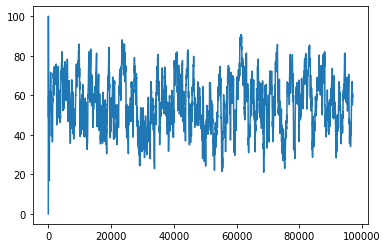

In [76]:
df[df.ticker == 'AAPL'].rsi_14.plot()

In [100]:
unique_trade_date[366]

numpy.datetime64('2012-11-15T00:00:00.000000000')

In [101]:
env_train = DummyVecEnv(
                    [
                        lambda: StockEnvTrade(
                            train_data,
                            train_data,
                            flag_days = None,
                            config=EnvConfig,
                            stock_dim=30,
                            unique_trade_date=unique_trade_date,
                            turbulence_threshold=500,
                            initial=True,
                            previous_state=[],
                            model_name='Debug',
                            iteration=1,
                            debug=False
                        )
                    ]
                )

In [102]:
100000 / 30

3333.3333333333335

In [85]:
act = [1] * 30

In [86]:
act

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [97]:
i = 1
while i != 365:
    env_train.step(np.array([[0]*30]))
    i+=1

====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0

====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0

====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0

====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0

====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0

====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
===DEBUG TRADING ENV===
====DEBUG====
Printing actions from the agent  [0 0 0 0 0 0 0 0 0 0 0

In [98]:
env_train.render()

([890934.3954730986,
  10.01974868774414,
  40.592559814453125,
  59.64093780517578,
  71.53553771972656,
  10.907181739807127,
  64.9392318725586,
  36.36564636230469,
  33.80458450317383,
  114.8525848388672,
  26.874906539916992,
  108.93802642822266,
  15.667767524719238,
  49.298614501953125,
  30.41961097717285,
  23.599536895751957,
  60.65630340576172,
  68.71463775634766,
  23.86186408996582,
  18.98678398132324,
  17.818069458007812,
  13.02940845489502,
  46.38459014892578,
  40.96178436279297,
  44.86096954345703,
  42.0848274230957,
  17.40414810180664,
  21.813013076782227,
  33.55302810668945,
  41.14797592163086,
  52.26510620117188,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  -0.108449067116469,
  -0.3248914367843198,
  -0.6328668150649079,
  -2.113715470049144,
  -0.3927213188510663,
  -0.74643258431196